<a href="https://colab.research.google.com/github/rahlgpta/Forrest-Fire-Detection/blob/main/Forrest_Fire_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
zip_file_path = '/content/drive/MyDrive/Dataset.zip'

In [4]:
extracted_path = '/content/dataset/'

In [5]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [6]:
train_data_dir = os.path.join(extracted_path, 'Forest Fire Dataset', 'Training')
test_data_dir = os.path.join(extracted_path, 'Forest Fire Dataset', 'Testing')

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

some images in provided dataset are in 250x250 while others are in 256x256

In [8]:
batch_size = 32
img_height, img_width = 250, 250

In [9]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [10]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Binary classification
)

Found 1520 images belonging to 2 classes.


In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_generator, epochs=num_epochs)


Epoch 1/10
48/48 [==============================] - 17s 108ms/step - loss: 0.3966 - accuracy: 0.8579
Epoch 2/10
48/48 [==============================] - 6s 116ms/step - loss: 0.2165 - accuracy: 0.9316
Epoch 3/10
48/48 [==============================] - 5s 98ms/step - loss: 0.1592 - accuracy: 0.9526
Epoch 4/10
48/48 [==============================] - 6s 124ms/step - loss: 0.1104 - accuracy: 0.9625
Epoch 5/10
48/48 [==============================] - 5s 98ms/step - loss: 0.1151 - accuracy: 0.9645
Epoch 6/10
48/48 [==============================] - 6s 122ms/step - loss: 0.1113 - accuracy: 0.9579
Epoch 7/10
48/48 [==============================] - 5s 101ms/step - loss: 0.0721 - accuracy: 0.9770
Epoch 8/10
48/48 [==============================] - 5s 110ms/step - loss: 0.0822 - accuracy: 0.9737
Epoch 9/10
48/48 [==============================] - 5s 98ms/step - loss: 0.0845 - accuracy: 0.9711
Epoch 10/10
48/48 [==============================] - 6s 121ms/step - loss: 0.0722 - accuracy: 0.9730


In [13]:
model.save('/content/drive/MyDrive/forest_fire_classifier.h5')


In [14]:
model = tf.keras.models.load_model('/content/drive/MyDrive/forest_fire_classifier.h5')


In [15]:
test_image_paths = [os.path.join(test_data_dir, img) for img in os.listdir(test_data_dir)]


In [16]:
test_images = []
for img_path in test_image_paths:
    img = load_img(img_path, target_size=(img_height, img_width))
    img = img_to_array(img) / 255.0  # Normalize pixel values
    test_images.append(img)

In [17]:
test_images = np.array(test_images)
test_predictions = model.predict(test_images)

12/12 [==============================] - 1s 66ms/step


In [18]:
for i in range(len(test_predictions)):
    predicted_label = "Non-Fire" if test_predictions[i] > 0.5 else "Fire"
    confidence = test_predictions[i][0] if predicted_label == "Non-Fire" else 1 - test_predictions[i][0]
    print(f"Image: {test_image_paths[i]}, Predicted Label: {predicted_label}, Confidence: {confidence}")

Image: /content/dataset/Forest Fire Dataset/Testing/nofire_0711.jpg, Predicted Label: Non-Fire, Confidence: 0.9933499693870544
Image: /content/dataset/Forest Fire Dataset/Testing/nofire_0948.jpg, Predicted Label: Non-Fire, Confidence: 0.9998825788497925
Image: /content/dataset/Forest Fire Dataset/Testing/fire_0569.jpg, Predicted Label: Fire, Confidence: 0.9999897684247117
Image: /content/dataset/Forest Fire Dataset/Testing/fire_0253.jpg, Predicted Label: Fire, Confidence: 0.9989916901104152
Image: /content/dataset/Forest Fire Dataset/Testing/fire_0593.jpg, Predicted Label: Fire, Confidence: 0.9967601355165243
Image: /content/dataset/Forest Fire Dataset/Testing/fire_0563.jpg, Predicted Label: Fire, Confidence: 0.9812436643987894
Image: /content/dataset/Forest Fire Dataset/Testing/nofire_0167.jpg, Predicted Label: Non-Fire, Confidence: 0.9999041557312012
Image: /content/dataset/Forest Fire Dataset/Testing/nofire_0281.jpg, Predicted Label: Non-Fire, Confidence: 0.9999120235443115
Image: /

In [19]:
random_index = random.randint(0, len(test_image_paths) - 1)
random_image = load_img(test_image_paths[random_index], target_size=(img_height, img_width))
random_image_array = img_to_array(random_image) / 255.0

In [20]:
random_prediction = model.predict(np.expand_dims(random_image_array, axis=0))
predicted_label = "Non-Fire" if random_prediction > 0.5 else "Fire"
confidence = random_prediction[0][0] if predicted_label == "Non-Fire" else 1 - random_prediction[0][0]


1/1 [==============================] - 0s 193ms/step


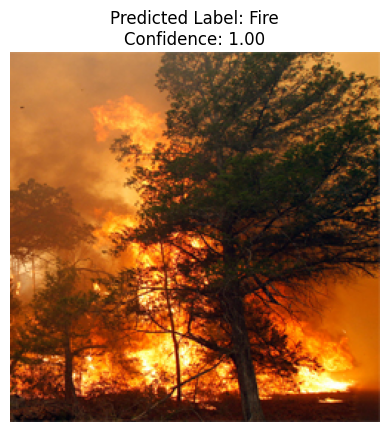

In [21]:
plt.imshow(random_image)
plt.title(f"Predicted Label: {predicted_label}\nConfidence: {confidence:.2f}")
plt.axis('off')
plt.show()